# Text Summariztion 

Підсумовування тексту за допомогою методів машинного навчання

1. Using Kohonen maps

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from minisom import MiniSom
import numpy as np

# Example sentences
sentences = ["Sentence one...", "Sentence two..."]

# Vectorize
vec = TfidfVectorizer(stop_words='english')
X = vec.fit_transform(sentences).toarray()

# Train SOM
som = MiniSom(10, 10, X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, 100)

# Map sentences to BMUs
bmu_mapping = {}
for idx, x in enumerate(X):
    bmu = som.winner(x)
    bmu_mapping.setdefault(bmu, []).append(idx)

# Pick representative from each cluster
summary_sentences = []
for bmu, idxs in bmu_mapping.items():
    rep_idx = min(idxs, key=lambda i: np.linalg.norm(X[i] - som.get_weights()[bmu]))
    summary_sentences.append(sentences[rep_idx])

# Sort by original order
summary_sentences.sort(key=lambda s: sentences.index(s))
summary = " ".join(summary_sentences)
print(summary)


Sentence one...


2. K-means Clustering

In [2]:
# pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
import numpy as np

def kmeans_summary_tfidf(sentences, K=5):
    vec = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=1)
    X = vec.fit_transform(sentences)            # sparse matrix
    kmeans = MiniBatchKMeans(n_clusters=K, random_state=42, batch_size=100)
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_          # dense

    rep_indices = []
    for cluster in range(K):
        idxs = np.where(labels == cluster)[0]
        if len(idxs) == 0:
            continue
        # compute distances from centroid -> choose nearest
        dists = np.linalg.norm(X[idxs].toarray() - centers[cluster], axis=1)
        rep = idxs[np.argmin(dists)]
        rep_indices.append(rep)

    # Order by original position for coherence
    rep_indices = sorted(rep_indices)
    summary = " ".join([sentences[i] for i in rep_indices])
    return summary


In [3]:
sntences_test = [
    "This Project represents the work related to Text Summarization. In this paper, we present a framework for summarizing the huge information",
    "Text Summarization is the process of identifying the most important and meaningful information in an input document",
    "IELTS Ready brings all our most popular IELTS preparation materials into one spot so you can easily browse what's on offer and track your progress.",
    "Get the IELTS score you're aiming for with our wealth of IELTS test preparation resources.",
    "Browse individual IELTS materials below, or sign up for IELTS Ready to access all our resources in one convenient platform. "
]

# summary = kmeans_summary_tfidf(sntences_test, K=2)
# print(summary)

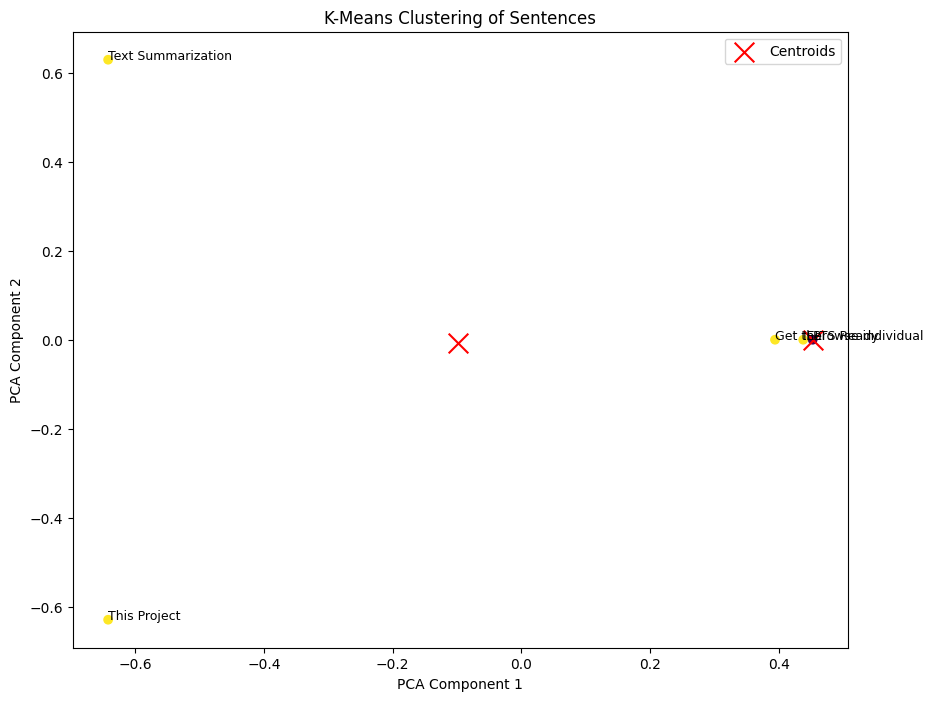

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_kmeans_clusters(sentences, K=5):
    vec = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=1)
    X = vec.fit_transform(sentences).toarray()  # dense matrix
    kmeans = MiniBatchKMeans(n_clusters=K, random_state=42, batch_size=100)
    kmeans.fit(X)
    
    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    plt.figure(figsize=(10, 8))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
    
    for i, sentence in enumerate(sentences):
        plt.annotate(" ".join(sentence.split()[:2]), (X_reduced[i, 0], X_reduced[i, 1]), fontsize=9, color='black')

    centers = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
    
    plt.title('K-Means Clustering of Sentences')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

plot_kmeans_clusters(sntences_test, K=2)

TODO:
1. Instead of PCA: random forest feature extraction 
2. Kohonen Maps
3. 

## Extractive and Abstractive Summarization 

Extractive: selecting and concatenating important sentences or phrases directly from the source text.
- Frequency-based methods (tf-idf)
- Graph-based algorithms (TextRank and LexRank)
- Supervised machine learning

Abstractive: generate new sentences, rephrasing and compressing content, similar to how humans summarize
- Seq2Seq (Sequence-to-Sequence Models)
- Pointer-Generator Networks
- Transformers (BERT, GPT, BART, T5)

Hybrid Approaches: a model might first select key sentences (extractive) and then paraphrase or compress them (abstractive).

Specialized Techniques:
- Topic-based summarization (summaries tailored to specific user queries or topics, often used in search engines or QA systems)
- Multi-document summarization (summarizing multiple articles at once: e.g., news aggregation)
- Guided summarization: Summaries that follow specific guidelines, like focusing on certain aspects (e.g., medical findings, legal conclusions).


## Graph-Based Text Summarization

Graph-based ranking algorithms have revolutionized the field of text mining by providing efficient and effective ways to extract valuable information from large text corpora. These algorithms leverage the inherent structure of texts, representing them as graphs where nodes represent textual elements (words, sentences, or documents) and edges represent relationships between these elements.

PageRank, originally developed by Larry Page and Sergey Brin for ranking web pages, can be applied to text mining. In this context, PageRank ranks nodes (e.g., words or sentences) based on their importance within the text graph. It iteratively calculates a ranking score for each node, considering the number and quality of links to it.

In center: These words have the highest PageRank scores, indicating they are central to the text's topic and well-connected to other words.
Significance: These words are likely key themes or important concepts within the text.



PageRank Scores:
{'the': 0.09311359219749941, 'chernivtsi': 0.03780072200711822, 'national': 0.014689303718242628, 'university': 0.03780072200711822, 'is': 0.026315010503799897, 'a': 0.03780072200711822, 'public': 0.014689303718242628, 'in': 0.03780072200711822, 'city': 0.014689303718242628, 'of': 0.07141343888199432, 'western': 0.014689303718242628, 'ukraine.': 0.014689303718242628, 'one': 0.014689303718242628, 'leading': 0.014689303718242628, 'ukrainian': 0.014689303718242628, 'institutions': 0.014689303718242628, 'for': 0.014689303718242628, 'higher': 0.014689303718242628, 'education,': 0.014689303718242628, 'it': 0.014689303718242628, 'was': 0.026315010503799897, 'founded': 0.014689303718242628, '1875': 0.014689303718242628, 'as': 0.014689303718242628, 'franz-josephs-universität': 0.014689303718242628, 'czernowitz': 0.014689303718242628, 'when': 0.014689303718242628, '(czernowitz)': 0.014689303718242628, 'capital': 0.014689303718242628, 'duchy': 0.014689303718242628, 'bukovina,': 0

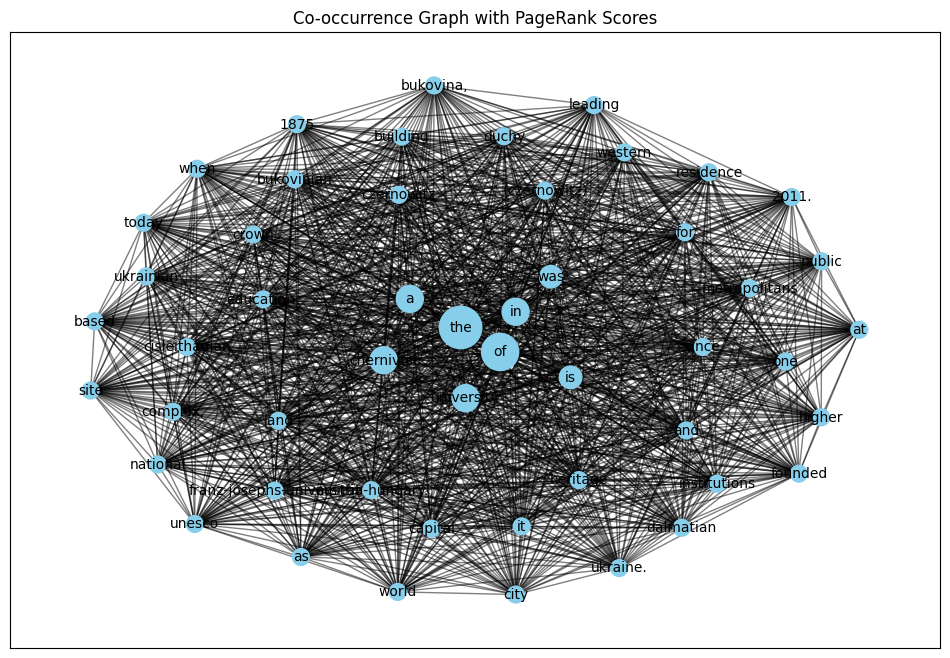

In [5]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

def preprocess_text(text):
    words = text.lower().split()
    return words

def build_co_occurrence_graph(words, window_size=2):
    G = nx.Graph()
    pairs = list(itertools.combinations(words, window_size))
    for pair in pairs:
        if G.has_edge(pair[0], pair[1]):
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(pair[0], pair[1], weight=1)
    return G

def apply_pagerank(G):
    pagerank_scores = nx.pagerank(G, weight='weight')
    return pagerank_scores

def generate_graph(G, pagerank_scores):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=[v * 10000 for v in pagerank_scores.values()], node_color='skyblue')
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    plt.title("Co-occurrence Graph with PageRank Scores")
    plt.show()

# Example usage
texts = [
    "Graph-based text mining involves representing text data as a graph and using graph algorithms to extract meaningful patterns.",
    "The Chernivtsi National University is a public university in the city of Chernivtsi in Western Ukraine. One of the leading Ukrainian institutions for higher education, it was founded in 1875 as the Franz-Josephs-Universität Czernowitz when Chernivtsi (Czernowitz) was the capital of the Duchy of Bukovina, a Cisleithanian crown land of Austria-Hungary. Today the university is based at the Residence of Bukovinian and Dalmatian Metropolitans building complex, a UNESCO World Heritage Site since 2011."
]

words = preprocess_text(texts[1])
G = build_co_occurrence_graph(words)
pagerank_scores = apply_pagerank(G)

print("PageRank Scores:")
print(pagerank_scores)

top_words = [score for score in pagerank_scores if pagerank_scores[score] > 0.02 and score not in ['the', 'is', 'in', 'and', 'of', 'a', 'to']]
print("Top words by PageRank:")
print(top_words)

generate_graph(G, pagerank_scores)

In [ ]:
from transformers import pipeline

# Add bert transformation of words into sentence 

## Extractive Summarization

Extractive summarization algorithms automatically generate summaries by selecting and combining key passages from the original text. Unlike human summarizers, these models focus on extracting the most important sentences without creating new content. The goal is to preserve the meaning of the original text while condensing it.

The TextRank algorithm is widely used for extractive summarization tasks. By ranking sentences based on their relevance and importance, it can generate a concise summary. Let's explore how this algorithm works with a sample text.

In [6]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import wikipedia
import en_core_web_sm # pip install spacy 

# Get wiki content.
wikisearch = wikipedia.page("Amitabh Bachchan")
wikicontent = wikisearch.content
nlp = en_core_web_sm.load()
doc = nlp(wikicontent)

# Save the wiki content to a file
# (for reference).
f = open("wikicontent.txt", "w")
f.write(wikicontent)
f.close()

# Summary (0.5% of the original content).
summ_per = summarize(wikicontent, ratio = 0.05)
print("Percent summary")
print(summ_per)

# Summary (200 words)
summ_words = summarize(wikicontent, word_count = 200)
print("Word count summary")
print(summ_words)

ModuleNotFoundError: No module named 'gensim.summarization'

## Text classification via SVM

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

# Training dataset
texts = [
    # Tech
    "The new iPhone was released with improved battery life",
    "AI and machine learning are transforming the industry",
    "Microsoft announced a new update for Windows",

    # Culture
    "The art exhibition attracted thousands of visitors",
    "A new novel has become a bestseller worldwide",
    "The film festival showcased international movies",

    # Science
    "Astronomers discovered a new exoplanet orbiting a star",
    "Researchers published findings on climate change",
    "A breakthrough in quantum computing was achieved",

    # Sports
    "The football team won the championship final",
    "The Olympic Games will be held next summer",
    "A new world record was set in the 100m sprint"
]

labels = [
    "tech", "tech", "tech",
    "culture", "culture", "culture",
    "science", "science", "science",
    "sports", "sports", "sports"
]

# Build pipeline: TF-IDF + SVM
model = make_pipeline(TfidfVectorizer(), LinearSVC())

# Train model
model.fit(texts, labels)

# Test new examples
test_texts = [
    "NASA announced a mission to Mars",
    "Apple released a new software update",
    "The theater play received great reviews",
    "The basketball team secured a close victory"
]

predictions = model.predict(test_texts)

for txt, pred in zip(test_texts, predictions):
    print(f"Text: {txt}\n → Predicted category: {pred}\n")


Text: NASA announced a mission to Mars
 → Predicted category: tech

Text: Apple released a new software update
 → Predicted category: tech

Text: The theater play received great reviews
 → Predicted category: sports

Text: The basketball team secured a close victory
 → Predicted category: sports



## Text Rank Algorithm

TextRank is a graph-based ranking algorithm inspired by PageRank (used by Google to rank web pages).
Instead of ranking web pages, we rank sentences in a document by their importance.

- Split the document into sentences. Clean and tokenize words (remove stopwords, punctuation, etc.).
- Each sentence is turned into a set of words.
- Compute similarity between every pair of sentences (e.g., cosine similarity with TF-IDF, or word overlap).
- Each sentence = a node.
- Edge weight between two nodes = similarity score between sentences.
- Apply the PageRank algorithm on the graph.
- Sentences that are similar to many other sentences will get a higher score.
- Sort sentences by score.
- Pick the top N sentences as the summary.



pip install --no-cache-dir spacy
pip install nltk transformers

gensim ??

In [8]:
import networkx
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download("punkt")

def textrank_text_summarizer(text, num_sentences=5):
    
    sentences = nltk.sent_tokenize(text)

    tfidvectorizer = TfidfVectorizer(
                                 ngram_range=(1,5),
                                 smooth_idf=True,
                                 use_idf=True)

    X = tfidvectorizer.fit_transform(sentences)
    similarity_matrix = (X * X.T).toarray()

    # build graph
    nx_graph = nx.from_numpy_array(similarity_matrix)

    # run PageRank
    scores = nx.pagerank(nx_graph)

    # sort sentences by score
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)

    # extract summary (top 2 sentences)
    summary = " ".join([s for _, s in ranked_sentences[:2]])
    return summary

texts = [
    """The Chernivtsi National University is a public university in the city of Chernivtsi in Western Ukraine. 
    One of the leading Ukrainian institutions for higher education, it was founded in 1875 as the Franz-Josephs-Universität Czernowitz 
    when Chernivtsi (Czernowitz) was the capital of the Duchy of Bukovina, a Cisleithanian crown land of Austria-Hungary. 
    Today the university is based at the Residence of Bukovinian and Dalmatian Metropolitans building complex, a 
    UNESCO World Heritage Site since 2011.
    Yuriy Fedkovych Chernivtsi National University consists of 17 buildings having a total of 105 units. 
    The total area is 110,800 square meters, including training buildings of 66 square meters.
    The architectural ensemble of the main campus of the university, the Residence of Bukovinian and Dalmatian Metropolitans, 
    is included on the list of UNESCO World Heritage Sites.
    The university operates Chernivtsi Botanical Garden, which features over a thousand different spices and an arboretum located 
    on the territory of the main campus.
    """
]

summary = textrank_text_summarizer(texts[0], num_sentences=2)
print(summary)


The architectural ensemble of the main campus of the university, the Residence of Bukovinian and Dalmatian Metropolitans, 
    is included on the list of UNESCO World Heritage Sites. Today the university is based at the Residence of Bukovinian and Dalmatian Metropolitans building complex, a 
    UNESCO World Heritage Site since 2011.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vmelnyk2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TODO:
- add code to streamlit, options, add more design
- deploy streamlit
- graphrank : add transf/bert
- stemming, lemmatization, removal of stop words
- kohonen maps, etc.
- tfidf, textrank, bert, bart, seq2seq 










## Generate sentence based on RageRank result

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PageRank Scores:
{'the': 0.09311359219749941, 'chernivtsi': 0.03780072200711822, 'national': 0.014689303718242628, 'university': 0.03780072200711822, 'is': 0.026315010503799897, 'a': 0.03780072200711822, 'public': 0.014689303718242628, 'in': 0.03780072200711822, 'city': 0.014689303718242628, 'of': 0.07141343888199432, 'western': 0.014689303718242628, 'ukraine.': 0.014689303718242628, 'one': 0.014689303718242628, 'leading': 0.014689303718242628, 'ukrainian': 0.014689303718242628, 'institutions': 0.014689303718242628, 'for': 0.014689303718242628, 'higher': 0.014689303718242628, 'education,': 0.014689303718242628, 'it': 0.014689303718242628, 'was': 0.026315010503799897, 'founded': 0.014689303718242628, '1875': 0.014689303718242628, 'as': 0.014689303718242628, 'franz-josephs-universität': 0.014689303718242628, 'czernowitz': 0.014689303718242628, 'when': 0.014689303718242628, '(czernowitz)': 0.014689303718242628, 'capital': 0.014689303718242628, 'duchy': 0.014689303718242628, 'bukovina,': 0

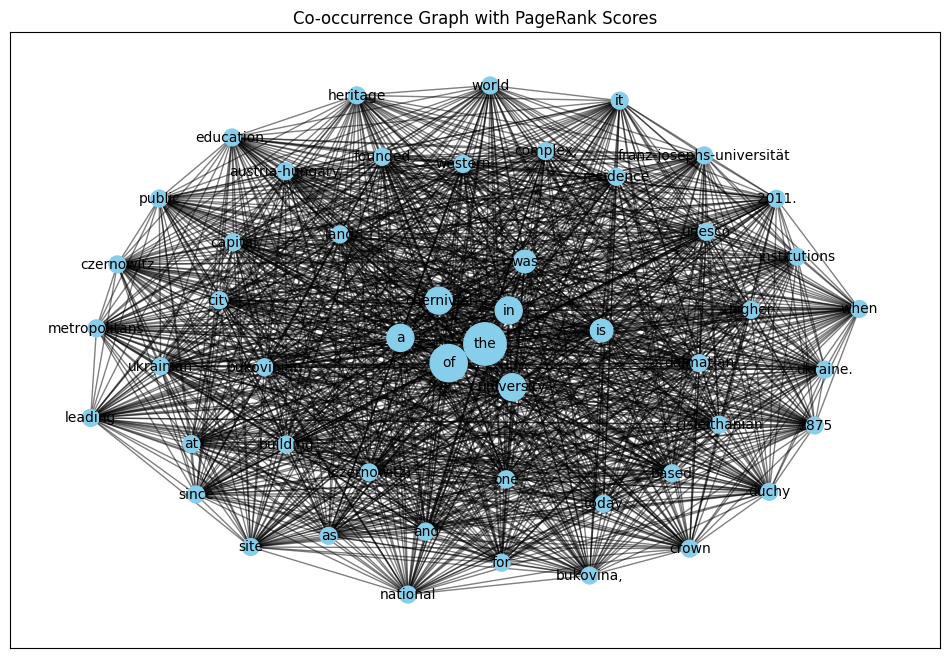

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vmelnyk2\.cache\huggingface\hub\models--google--flan-t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Fallin

chernivtsi university is a university


In [9]:
from transformers import pipeline

texts = [
    "Graph-based text mining involves representing text data as a graph and using graph algorithms to extract meaningful patterns.",
    "The Chernivtsi National University is a public university in the city of Chernivtsi in Western Ukraine. One of the leading Ukrainian institutions for higher education, it was founded in 1875 as the Franz-Josephs-Universität Czernowitz when Chernivtsi (Czernowitz) was the capital of the Duchy of Bukovina, a Cisleithanian crown land of Austria-Hungary. Today the university is based at the Residence of Bukovinian and Dalmatian Metropolitans building complex, a UNESCO World Heritage Site since 2011."
]

words = preprocess_text(texts[1])
G = build_co_occurrence_graph(words)
pagerank_scores = apply_pagerank(G)

print("PageRank Scores:")
print(pagerank_scores)

top_words = [score for score in pagerank_scores if pagerank_scores[score] > 0.02 and score not in ['the', 'is', 'in', 'and', 'of', 'a', 'to']]
print("Top words by PageRank:")
print(top_words)
top_words_joined = " ".join(top_words)

generate_graph(G, pagerank_scores)

# generator = pipeline("text2text-generation", model="t5-small")
# print(generator(f"make a sentence with: {top_words_joined}")[0]["generated_text"])
generator = pipeline("text2text-generation", model="google/flan-t5-small")
print(generator(f"Write a long sentence using the words: {top_words_joined}")[0]["generated_text"])


In [10]:
import scipy.linalg
import numpy as np

# Patch missing function for gensim
if not hasattr(scipy.linalg, "triu"):
    scipy.linalg.triu = np.triu

In [11]:
import spacy

nlp = spacy.load("en_core_web_md")
doc = nlp("The quick brown fox jumps over the lazy dog")
for token in doc:
    print(token.text, token.vector[:5])  # vector for each word


OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 4.974389367919073e-13


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


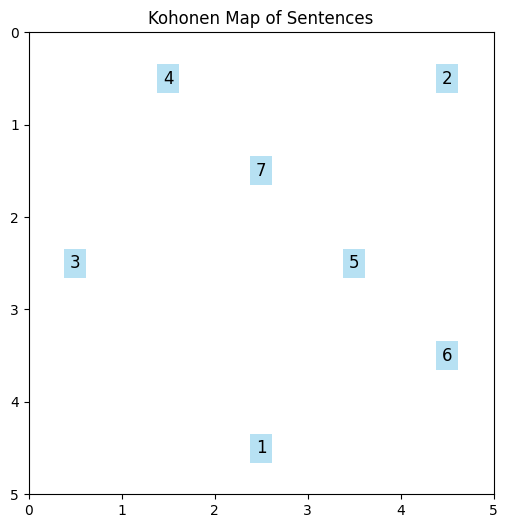

In [12]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import spacy

# example texts
texts = [
    "Artificial intelligence is transforming industries",
    "Deep learning improves image recognition",
    "Cultural heritage must be preserved",
    "Art exhibitions inspire creativity",
    "Quantum physics explores subatomic particles",
    "Renewable energy supports sustainability",
    "The Chernivtsi National University is a public university in the city of Chernivtsi in Western Ukraine"
]


# convert each sentence to a vector (average of word embeddings)
def sentence_vector(sentence, model):
    words = [w for w in sentence if w in model.wv]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[words], axis=0)

def build_kohonen_map(texts):
    
    # preprocess (tokenize)
    sentences = [simple_preprocess(t) for t in texts]

    # train Word2Vec model
    model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, workers=4, epochs=100)

    vectors = np.array([sentence_vector(s, model) for s in sentences])

    # normalize vectors
    scaler = MinMaxScaler()
    vectors_scaled = scaler.fit_transform(vectors)

    # initialize and train Kohonen SOM
    som_x, som_y = 5, 5  # grid size
    som = MiniSom(som_x, som_y, vectors_scaled.shape[1], sigma=0.5, learning_rate=0.5)
    som.random_weights_init(vectors_scaled)
    som.train(vectors_scaled, 1000, verbose=True)

    return som, vectors_scaled, som_x, som_y

def display_kohonen_map(som, vectors_scaled, som_x, som_y):

    # plot results
    plt.figure(figsize=(6, 6))
    for i, x in enumerate(vectors_scaled):
        w = som.winner(x)
        plt.text(w[0]+0.5, w[1]+0.5, str(i+1), fontsize=12,
                ha='center', va='center',
                bbox=dict(facecolor='skyblue', alpha=0.6, lw=0))
    plt.title("Kohonen Map of Sentences")
    plt.xlim([0, som_x])
    plt.ylim([0, som_y])
    plt.gca().invert_yaxis()
    plt.show()

som, vectors_scaled, som_x, som_y = build_kohonen_map(texts)
display_kohonen_map(som, vectors_scaled, som_x, som_y)


## Extractive summarization with unsupervised ML

In [13]:
import pandas as pd

data = pd.read_csv('../resources/cnn_dailymail/test.csv')
display(data.head(10))
# print(data.loc[1, "article"])

sentences = data.loc[1, "article"].split(". ")
for sentence in sentences:
    print(sentence)

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."
5,5ed5e3fbd235a8046cd3b87f4a1aa51b856c8ec3,This is the moment that a crew of firefighters...,Giant pig fell into the swimming pool at his h...
6,6394f51b120ceb3da5e7b53dd5167fc4cf80b514,The amount of time people spend listening to B...,Figures show that while millions still tune in...
7,98be9b2d558c17df8a13597195957a7c8587ddcd,"(CNN)So, you'd like a ""Full House"" reunion and...","Show will return with a one-hour special, foll..."
8,57f68638739c3a1de8d9922b389d6ded39977012,"At 11:20pm, former world champion Ken Doherty ...",Reanne Evans faced Ken Doherty in World Champi...
9,20778c35c19d741cc182719de336d71e1a0b228e,A gang of six men have been jailed for a total...,Gang have been jailed for a total of 31 years ...


A drunk teenage boy had to be rescued by security after jumping into a lions' enclosure at a zoo in western India
Rahul Kumar, 17, clambered over the enclosure fence at the Kamla Nehru Zoological Park in Ahmedabad, and began running towards the animals, shouting he would 'kill them'
Mr Kumar explained afterwards that he was drunk and 'thought I'd stand a good chance' against the predators
Next level drunk: Intoxicated Rahul Kumar, 17, climbed into the lions' enclosure at a zoo in Ahmedabad and began running towards the animals shouting 'Today I kill a lion!' Mr Kumar had been sitting near the enclosure when he suddenly made a dash for the lions, surprising zoo security
The intoxicated teenager ran towards the lions, shouting: 'Today I kill a lion or a lion kills me!' A zoo spokesman said: 'Guards had earlier spotted him close to the enclosure but had no idea he was planing to enter it
'Fortunately, there are eight moats to cross before getting to where the lions usually are and he fell

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sentence_clusters(
    embeddings: np.ndarray,
    labels: np.ndarray,
    sentences: list[str],
    annotate: bool = True,
    reducer: str = "umap",
):
    """
    Plot clusters of sentence embeddings in 2D using UMAP (default) or TSNE.
    - embeddings: np.ndarray of shape (n_sentences, dim)
    - labels: (n_sentences,) integers from clustering
    - sentences: list of original sentences (for annotation)
    - annotate: if True, show sentence indices on plot instead of full text
    - reducer: 'umap' or 'tsne'
    """
    # --- Dimensionality reduction to 2D
    if reducer.lower() == "umap":
        try:
            import umap
            reducer_model = umap.UMAP(n_neighbors=10, min_dist=0.1, random_state=42)
            emb2d = reducer_model.fit_transform(embeddings)
        except ImportError:
            print("UMAP not available, falling back to TSNE")
            from sklearn.manifold import TSNE
            emb2d = TSNE(n_components=2, random_state=42, perplexity=3).fit_transform(embeddings)
    else:
        from sklearn.manifold import TSNE
        emb2d = TSNE(n_components=2, random_state=42, perplexity=3).fit_transform(embeddings)

    # --- Plot
    plt.figure(figsize=(8,6))
    num_clusters = len(set(labels))
    for c in range(num_clusters):
        idx = np.where(labels == c)[0]
        pts = emb2d[idx]
        plt.scatter(pts[:,0], pts[:,1], label=f"Cluster {c}")

    # annotate with indices (not full text, too long)
    if annotate:
        for i, (x, y) in enumerate(emb2d):
            plt.text(x+0.01, y+0.01, str(i) + " " + " ".join(sentences[i].split()[:2]), fontsize=8)

    plt.legend()
    plt.title("Sentence embedding clusters (reduced to 2D)")
    plt.show()


In [16]:
"""
sbert_kmeans_summarizer.py

Extractive summarization using SBERT sentence embeddings + KMeans clustering.

Usage example at bottom.
"""

from typing import List, Optional
import nltk
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Ensure punkt tokenizer is available
nltk.download('punkt_tab')
try:
    nltk.data.find("tokenizers/punkt")
except LookupError:
    nltk.download("punkt")


def split_sentences(text: str) -> List[str]:
    """Split text into sentences using nltk.sent_tokenize and trim whitespace."""
    sents = nltk.tokenize.sent_tokenize(text)
    # Filter out very short or empty
    sents = [s.strip() for s in sents if s and len(s.strip()) > 1]
    return sents


def embed_sentences(sentences: List[str], model_name: str = "all-MiniLM-L6-v2") -> np.ndarray:
    """
    Return sentence embeddings for a list of sentences using SBERT.
    Default model is lightweight and fast: 'all-MiniLM-L6-v2'.
    """
    model = SentenceTransformer(model_name)
    embeddings = model.encode(sentences, convert_to_numpy=True, show_progress_bar=False)
    return embeddings


def choose_k(num_sentences: int, k: Optional[int], compression_ratio: float = 0.2) -> int:
    """
    Decide on number of clusters (k).
    If k provided, use it. Otherwise derive from compression_ratio.
    """
    if k is not None:
        return max(1, min(num_sentences, k))
    # heuristic: choose at least 1 and at most num_sentences
    k_derived = max(1, int(np.ceil(num_sentences * compression_ratio)))
    return min(num_sentences, k_derived)


def summarize_by_kmeans(
    text: str,
    model_name: str = "all-MiniLM-L6-v2",
    k: Optional[int] = None,
    compression_ratio: float = 0.2,
    random_state: int = 42,
    build_plot: bool = False
) -> List[str]:
    """
    Main function: returns a list of selected sentences (summary).
    - text: input document (str)
    - model_name: SBERT model
    - k: desired number of sentences in summary (optional)
    - compression_ratio: if k is None, use ratio * n_sentences
    """
    sentences = split_sentences(text)
    if not sentences:
        return []

    # Determine number of clusters / summary sentences
    num_sentences = len(sentences)
    k_final = choose_k(num_sentences, k, compression_ratio)

    # Embed sentences
    embeddings = embed_sentences(sentences, model_name=model_name)

    # KMeans clustering
    # Use n_init='auto' for scikit-learn >=1.4 compatibility; otherwise set an integer.
    kmeans = KMeans(n_clusters=k_final, random_state=random_state, n_init="auto")
    cluster_ids = kmeans.fit_predict(embeddings)
    centroids = kmeans.cluster_centers_

    # For each cluster, pick sentence closest to centroid (cosine similarity)
    chosen_indices = []
    for cluster_id in range(k_final):
        # indices of sentences in this cluster
        cluster_indices = np.where(cluster_ids == cluster_id)[0]
        if cluster_indices.size == 0:
            continue
        cluster_embs = embeddings[cluster_indices]
        centroid = centroids[cluster_id].reshape(1, -1)
        sims = cosine_similarity(cluster_embs, centroid).reshape(-1)  # similarity to centroid
        best_idx_in_cluster = cluster_indices[np.argmax(sims)]
        chosen_indices.append(best_idx_in_cluster)

    # Order selected sentences by their original position in the document
    chosen_indices = sorted(chosen_indices)
    summary_sentences = [sentences[i] for i in chosen_indices]

    if build_plot:
        plot_sentence_clusters(embeddings, cluster_ids, sentences, annotate=True, reducer="umap")

    return summary_sentences


def get_summary_text(summary_sentences: List[str]) -> str:
    """Join summary sentences into a single text (keeps sentence punctuation as-is)."""
    return " ".join(summary_sentences)



example_text = (
        "Artificial intelligence is transforming multiple industries across the world. "
        "From healthcare to finance, AI systems help automate complex tasks and provide insights. "
        "Deep learning models, a subfield of AI, have shown state-of-the-art results in image recognition. "
        "However, they require large amounts of data and compute. "
        "Researchers are now focusing on more efficient architectures and self-supervised learning. "
        "Ethical considerations like bias and explainability remain critical for deployment."
    )

# Option A: explicit number of sentences in summary
summary_sentences = summarize_by_kmeans(example_text, k=2)
print("Summary (k=2):")
print(get_summary_text(summary_sentences))
print()

# Option B: compression ratio (20% of sentences)
summary_sentences = summarize_by_kmeans(example_text, k=None, compression_ratio=0.3)
print("Summary (compression_ratio=0.3):")
print(get_summary_text(summary_sentences))


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vmelnyk2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Summary (k=2):
From healthcare to finance, AI systems help automate complex tasks and provide insights. Ethical considerations like bias and explainability remain critical for deployment.

Summary (compression_ratio=0.3):
From healthcare to finance, AI systems help automate complex tasks and provide insights. Ethical considerations like bias and explainability remain critical for deployment.


UMAP not available, falling back to TSNE


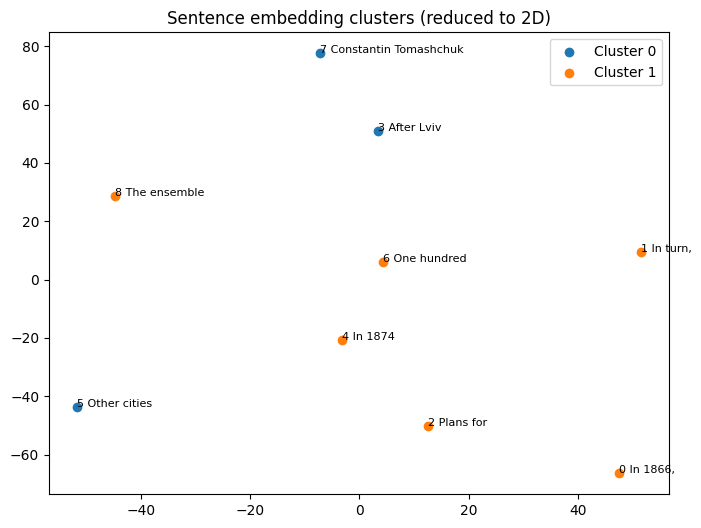

Summary (k=3):
After Lviv University had declared Polish a teaching language in 1871, a Bukovina committee led by the ethnically Romanian jurist and liberal politician Constantin Tomashchuk (1840–1889), a member of the Imperial Council, called for the foundation of a German college in multilingual Czernowitz about 740 kilometres (460 mi) "beyond" Vienna. One hundred years after the affiliation of Bukovina to the Austrian monarchy, the Franz-Josephs-Universität was inaugurated on 4 October 1875 (the name day of the emperor) on the basis of the Czernowitz Higher Theological School.


In [17]:
text = "In 1866, the Austrian Empire had lost the war against Prussia ending the German Confederation, which was followed by the establishment of the German Empire in 1871. In turn, Habsburg emperor Francis Joseph I turned his attention to his eastern crown lands. Plans for a Germanophone university were modelled on the establishment in 1872 of the University of Straßburg Kaiser-Wilhelms-Universität, named after German Emperor William I, in annexed Alsace-Lorraine. After Lviv University had declared Polish a teaching language in 1871, a Bukovina committee led by the ethnically Romanian jurist and liberal politician Constantin Tomashchuk (1840–1889), a member of the Imperial Council, called for the foundation of a German college in multilingual Czernowitz about 740 kilometres (460 mi) \"beyond\" Vienna. In 1874 they addressed a petition to the Austrian Minister of Education Karl von Stremayr, on whose proposal Emperor Francis Joseph finally resolved upon the establishment of a university, which was decided on by the two houses of the Imperial Council on 13 and 20 March 1875. Other cities applying for the creation of a college, such as Trieste, Olomouc, Brno, Ljubljana or Salzburg, were unsuccessful. One hundred years after the affiliation of Bukovina to the Austrian monarchy, the Franz-Josephs-Universität was inaugurated on 4 October 1875 (the name day of the emperor) on the basis of the Czernowitz Higher Theological School. Constantin Tomashchuk was appointed its first rector. The ensemble of the Residence, combining elements of national, Byzantine, Gothic and Baroque architecture, is an outstanding example of 19th-century historicist architecture, design and planning, expressing the cultural identity of the Orthodox Church within the Austro-Hungarian Empire."

summary_sentences = summarize_by_kmeans(text, k=2, build_plot=True)
print("Summary (k=3):")
print(get_summary_text(summary_sentences))



UMAP not available, falling back to TSNE


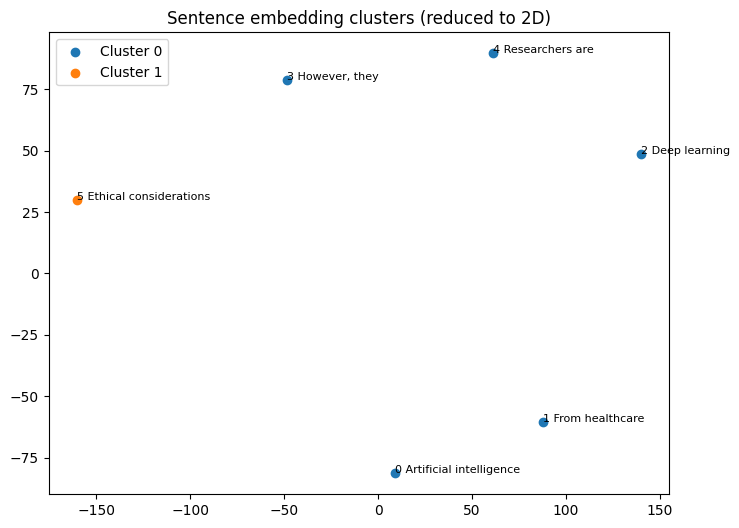

Summary (k=2):
From healthcare to finance, AI systems help automate complex tasks and provide insights. Ethical considerations like bias and explainability remain critical for deployment.


In [18]:
summary_sentences = summarize_by_kmeans(example_text, k=2, build_plot=True)
print("Summary (k=2):")
print(get_summary_text(summary_sentences))

UMAP not available, falling back to TSNE


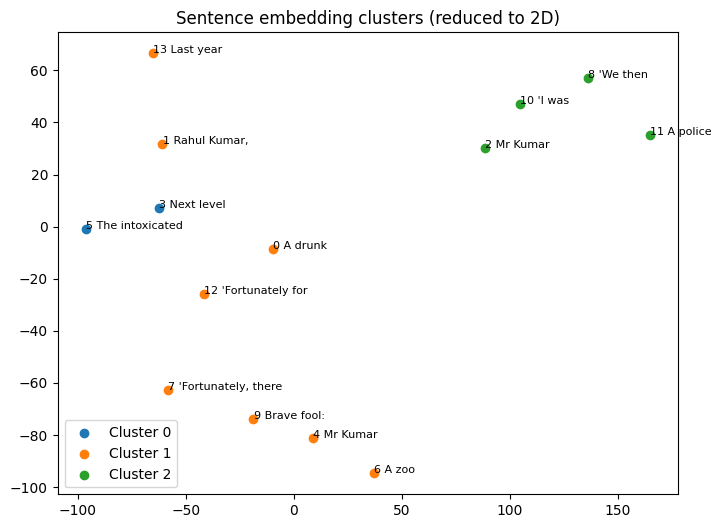

Summary (k=2):
Mr Kumar explained afterwards that he was drunk and 'thought I'd stand a good chance' against the predators. Next level drunk: Intoxicated Rahul Kumar, 17, climbed into the lions' enclosure at a zoo in Ahmedabad and began running towards the animals shouting 'Today I kill a lion!' 'Fortunately for him, the lions were asleep and the zoo guards acted quickly enough to prevent a tragedy similar to that in Delhi.'


In [19]:
summary_sentences = summarize_by_kmeans(data.loc[1, "article"], k=3, build_plot=True)
print("Summary (k=2):")
print(get_summary_text(summary_sentences))

**Kohonen maps: now the same algorithm, using SOM**

In [20]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

nltk.download('punkt')

def sentence_vector(sentence_tokens, model):
    vectors = [
        model.wv[word] for word in sentence_tokens if word in model.wv
    ]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

def summarize_by_som(
        text: str, 
        n: int = 3,
        build_plot: bool = False) -> str:
    # Split text into sentences 
    sentences = sent_tokenize(text)

    # Tokenize each sentence into words
    tokenized_sentences = [word_tokenize(s.lower()) for s in sentences]

    w2v_model = Word2Vec(
        sentences=tokenized_sentences,
        vector_size=100,
        window=5,
        min_count=1,
        workers=2,
        epochs=50
    )

    sentence_vectors = np.array([
        sentence_vector(tokens, w2v_model) for tokens in tokenized_sentences
    ])

    # Build Kohonen map 
    som_size = int(np.ceil(np.sqrt(len(sentence_vectors))))  # grid size
    som = MiniSom(som_size, som_size, sentence_vectors.shape[1], sigma=0.5, learning_rate=0.5)
    som.random_weights_init(sentence_vectors)
    som.train_random(sentence_vectors, 100)

    if build_plot:
        # Visualize clusters 
        plt.figure(figsize=(8, 8))
        for i, vec in enumerate(sentence_vectors):
            w = som.winner(vec)
            plt.text(w[0] + 0.5, w[1] + 0.5, str(i) + " " + " ".join(sentences[i].split()[:2]), fontsize=10,
                ha='center', va='center',
                bbox=dict(facecolor='skyblue', alpha=0.6, lw=0))
        plt.title("Sentence Clusters (Kohonen Map)")
        plt.xlim([0, som_size])
        plt.ylim([0, som_size])
        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.show()
    
    # Get each sentence’s winning neuron
    winners = [som.winner(vec) for vec in sentence_vectors]

    # Cluster sentences by neuron position
    clusters = {}
    for i, w in enumerate(winners):
        clusters.setdefault(w, []).append(i)
    
    # Sort clusters by how many sentences they contain
    sorted_clusters = sorted(clusters.items(), key=lambda x: len(x[1]), reverse=True)
    selected_indices = [v[0] for k, v in sorted_clusters[:n]]

    summary = " ".join([sentences[i] for i in sorted(selected_indices)])
    return summary

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vmelnyk2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


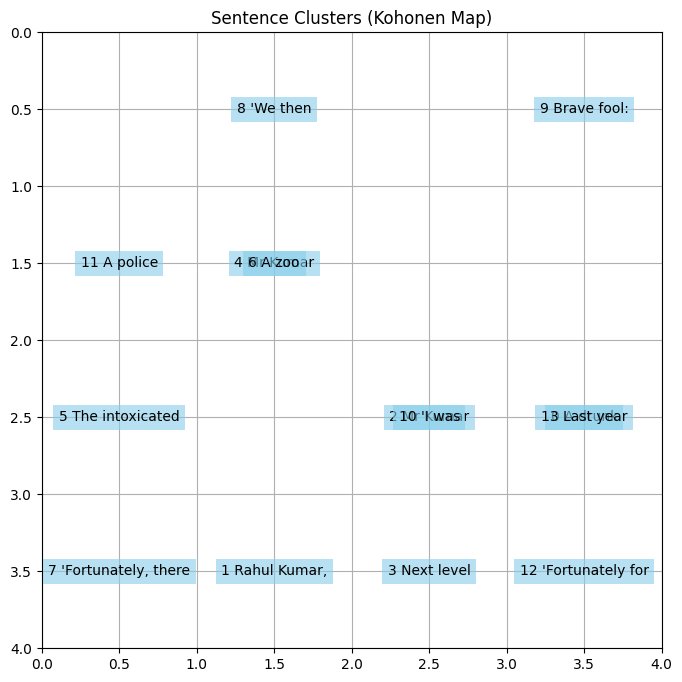

Summary (k=2): A drunk teenage boy had to be rescued by security after jumping into a lions' enclosure at a zoo in western India. Mr Kumar explained afterwards that he was drunk and 'thought I'd stand a good chance' against the predators. Mr Kumar had been sitting near the enclosure when he suddenly made a dash for the lions, surprising zoo security.


: 

In [ ]:
summary_sentences = summarize_by_som(data.loc[1, "article"], n=3, build_plot=True)

print(f"Summary (k=2): {summary_sentences}")
